https://www.kaggle.com/docs/api

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

# Configurando o Pandas para exibir todas as colunas do DataFrame
pd.set_option('display.max_columns', None)


### Baixando os dados diretamente de um link compartilhável do Google Drive:

In [2]:
dicio_url = 'https://drive.google.com/uc?export=download&id=1lDPey3tYshZfgZRvGw3QoxrKCNRwHMKR' # dicionário de dados
df_url = 'https://drive.google.com/uc?export=download&id=1RgYpo9UVA6NM8dyvrHt7biGRaKhJAT9s' # base

dicio = pd.read_excel(dicio_url)
df = pd.read_csv(df_url)

<ipython-input-2-b3fb39745fb8>:5: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(df_url)


In [3]:
display(dicio)

,Airbnb Open Data Dictionary,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,Field,Type,Description
3,id,integer,Airbnb's unique identifier for the listing
4,listing_url,text,NaN
...,...,...,...
73,calculated_host_listings_count,integer,The number of listings the host has in the cur...
74,calculated_host_listings_count_entire_homes,integer,The number of Entire home/apt listings the hos...
75,calculated_host_listings_count_private_rooms,integer,The number of Private room listings the host h...
76,calculated_host_listings_count_shared_rooms,integer,The number of Shared room listings the host ha...


In [4]:
# Verificando o dicionário de dados:
for i in range(len(dicio)):
  print(f'{dicio.iloc[i,0]}: {dicio.iloc[i,2]}')

nan: nan
nan: nan
Field: Description
id: Airbnb's unique identifier for the listing
listing_url: nan
scrape_id: Inside Airbnb "Scrape" this was part of
last_scraped: UTC. The date and time this listing was "scraped".
source: One of "neighbourhood search" or "previous scrape". "neighbourhood search" means that the listing was found by searching the city, while "previous scrape" means that the listing was seen in another scrape performed in the last 65 days, and the listing was confirmed to be still available on the Airbnb site.
name: Name of the listing
description: Detailed description of the listing
neighborhood_overview: Host's description of the neighbourhood
picture_url: URL to the Airbnb hosted regular sized image for the listing
host_id: Airbnb's unique identifier for the host/user
host_url: The Airbnb page for the host
host_name: Name of the host. Usually just the first name(s).
host_since: The date the host/user was created. For hosts that are Airbnb guests this could be the da

In [5]:
display(df.head())

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


### Tratamento dos dados e Análise exploratória

In [6]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
print(df.columns)

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')


In [7]:
# Tratando os valores monetários (retirando o cifrão e transformando em valor numérico):
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '').astype(float)
df['service_fee'] = df['service_fee'].str.replace('$', '')
df['service_fee'] = df['service_fee'].str.replace(',', '').astype(float)

In [8]:
# Contar valores NA da coluna price:
print('Valores missing em price: ',df['price'].isna().sum())
print('Valores missing em review_rate_number: ', df['review_rate_number'].isna().sum())

# Removendo esses valores NA:
df = df.dropna(subset=['price','review_rate_number'])

Valores missing em price:  247
Valores missing em review_rate_number:  326


In [9]:
# Criando função para gerar estatísticas descritivas:
def estatisticas(dados, boxplot = True):
  media_val = dados.mean() # média
  min_val = dados.min() # valor mínimo
  max_val = dados.max() # valor máximo
  q1 = dados.quantile(0.25) # primeiro quartil
  median_val = dados.median() # segundo quartil/mediana
  q3 = dados.quantile(0.75) # terceiro quartil
  std_val = dados.std() # desvio padrão
  moda_val = dados.mode()[0] # moda

  print(f'Média: {round(media_val,4)}')
  print(f'Desvio padrão: {round(std_val,4)}')
  print(f'Valor mínimo: {min_val}')
  print(f'Primeiro quartil (Q1): {q1}')
  print(f'Mediana (Q2): {median_val}')
  print(f'Terceiro quartil (Q3): {q3}')
  print(f'Valor máximo: {max_val}')
  print(f'Moda: {moda_val}')

  # Boxplot:
  if boxplot is True:
    plt.figure(figsize=(8,5))
    plt.boxplot(dados.dropna(), vert=True)
    plt.title(f'Boxplot: {dados.name}')
    plt.xlabel(dados.name)
    plt.ylabel('Valores')
    plt.xticks([])
    plt.show()


In [10]:
# Contar valores NA da coluna price:
df['review_rate_number'].isna().sum()

0

Média: 625.3746
Desvio padrão: 331.6604
Valor mínimo: 50.0
Primeiro quartil (Q1): 340.0
Mediana (Q2): 625.0
Terceiro quartil (Q3): 913.0
Valor máximo: 1200.0
Moda: 206.0


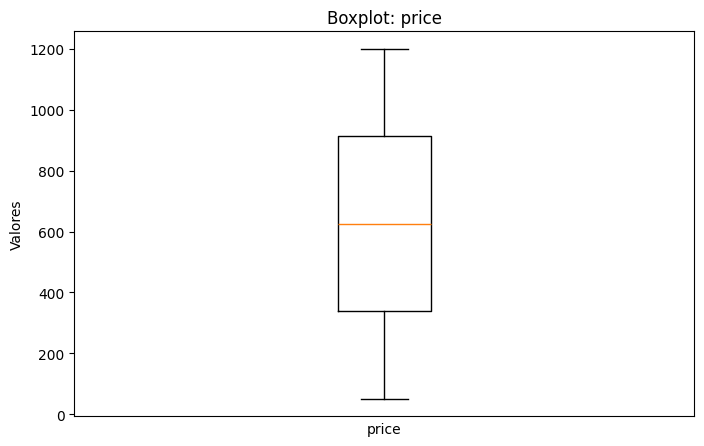

In [11]:
# Primeiramente, vamos iniciar analisando o preço diário em dólar das acomodações:
estatisticas(df['price'])

O valor médio das acomodações é de 625 dólares, e não identificamos outliers. Os valores variam de 50 a 1200 dólares.

Analisando a distribuição dos preços:

25% das acomodações custam até 340 dólares;
50% (mediana) têm valores até 624 dólares;
75% estão abaixo de 913 dólares.

Esses valores correspondem a 28%, 52% e 76% do valor máximo de 1200 dólares, respectivamente. A proximidade dos percentuais em relação aos quartis sugere uma distribuição equilibrada e uniforme dos preços das acomodações.

Média: 3.2793
Desvio padrão: 1.2845
Valor mínimo: 1.0
Primeiro quartil (Q1): 2.0
Mediana (Q2): 3.0
Terceiro quartil (Q3): 4.0
Valor máximo: 5.0
Moda: 5.0


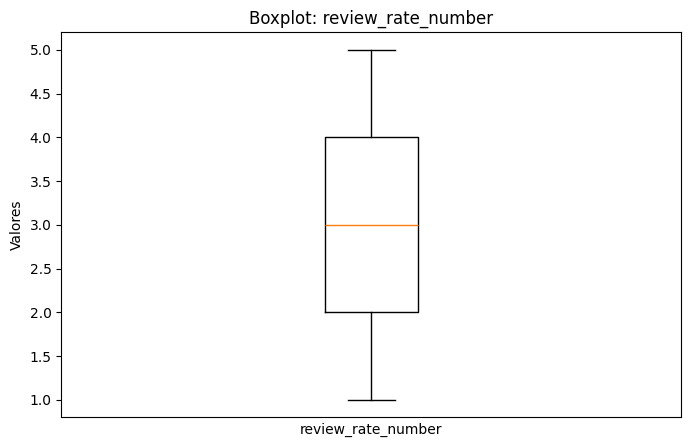

In [12]:
# Vamos, agora, analisar as notas das acomodações:
estatisticas(df['review_rate_number'])

As notas das acomodações variam entre 1 e 5, com uma média de 3,28. A nota mais frequente é 5, indicando que muitas acomodações possuem uma avaliação alta. Além disso, é possível analisar a distribuição relativa de cada uma das cinco notas para entender melhor a percepção dos usuários sobre as acomodações.

In [13]:
df['review_rate_number'].value_counts(normalize=True) * 100

,proportion
review_rate_number,
5.0,22.845157
4.0,22.820654
3.0,22.750083
2.0,22.585419
1.0,8.998687


A tabela de frequência relativa das notas mostra uma distribuição bastante próxima entre as notas de 2 a 5, todas em torno de 22%. A única exceção é a nota 1, que possui uma frequência um pouco menor, representando aproximadamente 9% das avaliações. Isso sugere uma leve tendência de avaliações mais positivas, com poucas acomodações recebendo a nota mínima.

Média: 8.1228
Desvio padrão: 30.5563
Valor mínimo: -1223.0
Primeiro quartil (Q1): 2.0
Mediana (Q2): 3.0
Terceiro quartil (Q3): 5.0
Valor máximo: 5645.0
Moda: 1.0


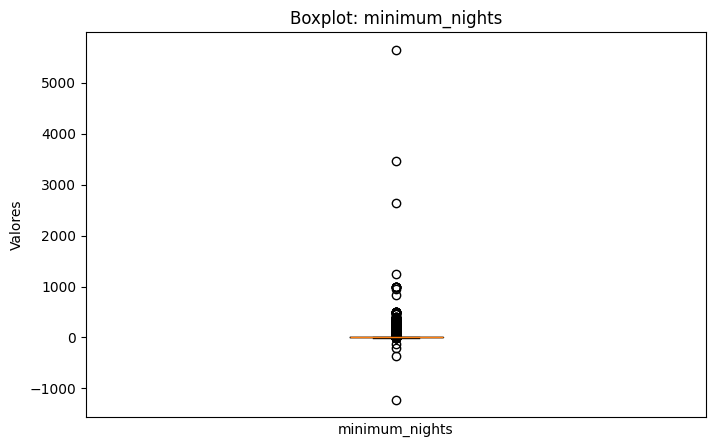

In [14]:
# Vamos, agora, analisar o mínimo de noites de hospedagem exigidos pelas acomodações:
estatisticas(df['minimum_nights'])

A análise sugere a presença de valores inconsistentes que precisam ser investigados e tratados. Observando o boxplot, identificamos valores negativos (o que é impossível) e valores extremamente altos, que parecem suspeitos. A próxima etapa será examinar esses valores atípicos mais detalhadamente e aplicar os tratamentos necessários.

In [15]:
# Primeiramente, vamos verificar o total de valores negativos para a variável 'minimum_nights':
print(len(df[df['minimum_nights'] < 0]))
display(df[df['minimum_nights'] < 0])

13


,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
176,1098541,BROOKLYN VICTORIAN STYLE SUITE.....,83631499592,unconfirmed,Frederick,Brooklyn,Fort Greene,40.69098,-73.97113,United States,US,False,flexible,Private room,2008.0,1155.0,231.0,-10.0,213.0,6/24/2019,2.00,5.0,2.0,19.0,There is no smoking on the property. No outsid...,NaN
352,1195746,"Beautiful, Bright’s, Warm & Spacious 1.5BR Apt",2227683633,unconfirmed,Grant,Brooklyn,Crown Heights,40.67174,-73.95663,NaN,NaN,NaN,NaN,Entire home/apt,2009.0,73.0,15.0,-5.0,104.0,6/21/2019,1.04,5.0,1.0,31.0,We are a second-floor apartment so please do n...,NaN
398,1221151,SUPER BIG AND COZY PRIVATE BEDROOM,50336791874,verified,Tucker,Brooklyn,Kensington,40.64302,-73.97255,United States,US,False,flexible,Private room,2015.0,779.0,156.0,-1.0,82.0,5/19/2019,0.94,2.0,2.0,131.0,"no inside smoking, quiet(ish) after 11, help y...",NaN
421,1233854,Charming Nolita Apartment!!,7389895192,verified,Belinda,Manhattan,Nolita,40.72094,-73.99706,United States,US,False,flexible,Entire home/apt,2008.0,874.0,175.0,-10.0,68.0,6/10/2019,0.69,5.0,1.0,13.0,NaN,NaN
441,1244900,Cozy apartment in a brownstone,81186886194,verified,Adelaide,Manhattan,Harlem,40.80497,-73.95016,United States,US,False,moderate,Entire home/apt,2021.0,920.0,184.0,-12.0,203.0,7/6/2019,2.14,5.0,3.0,77.0,NaN,NaN
478,1265335,Charming upper west side apartment,89878315253,unconfirmed,Alen,Manhattan,Upper West Side,40.77886,-73.98042,United States,US,True,strict,Entire home/apt,2022.0,410.0,82.0,-2.0,129.0,6/7/2019,1.33,2.0,1.0,381.0,Please remember that this is a residential bui...,NaN
525,1291294,Chateau Style Brooklyn Loft for Singles or Cou...,2631536622,verified,Carlos,Brooklyn,Bedford-Stuyvesant,40.68967,-73.95445,United States,US,False,moderate,Entire home/apt,2022.0,413.0,83.0,-3.0,42.0,5/18/2019,0.44,5.0,1.0,292.0,BUILDING IS RESIDENTIAL. DOCTORS AND NURSES WH...,NaN
42446,24444262,"Cozy room in bright, spacious apartment",84040511136,verified,Steven,Bronx,Hunts Point,40.81731,-73.89052,United States,US,False,moderate,Private room,2003.0,1200.0,240.0,-1223.0,0.0,NaN,NaN,2.0,4.0,341.0,Smoking is strictly prohibited. Your pets are ...,NaN
42500,24474086,2bd BOUTIQUE Apartament in the heart of MANHA...,2679070022,unconfirmed,Tom,Manhattan,Hell's Kitchen,40.76694,-73.98773,United States,US,True,flexible,Entire home/apt,2009.0,711.0,142.0,-365.0,13.0,7/7/2019,5.91,4.0,4.0,0.0,Please pick up/drop packet with front desk con...,NaN
42538,24495073,Newly Renovated Garden Apartment,98469733112,verified,Margie,Brooklyn,Bedford-Stuyvesant,40.68470,-73.94350,United States,US,True,moderate,Entire home/apt,2022.0,85.0,17.0,-200.0,3.0,4/23/2019,1.06,2.0,1.0,157.0,No smoking or pets allowed and we request that...,NaN


In [16]:
# As observações com valores negativos serão, então, removidas da base:
df = df[df['minimum_nights'] >= 0]

In [17]:
# Verificando o valor máximo do mínimo de noites exigidas:
print(df['minimum_nights'].max())

5645.0


In [18]:
# Vamos, agora, verificar os outliers. Para isso, precisamos calcular o intervalo interquartílico:
IQR = df['minimum_nights'].quantile(0.75) - df['minimum_nights'].quantile(0.25)

limite_inferior = df['minimum_nights'].quantile(0.25) - 1.5 * IQR
limite_superior = df['minimum_nights'].quantile(0.75) + 1.5 * IQR

print(f'Limite inferior: {limite_inferior}')
print(f'Limite superior: {limite_superior}')

# Total de valores acima do limite superior:
print(f'{round((len(df[df["minimum_nights"] > limite_superior])/len(df))*100,2)}% dos valores são outliers')

Limite inferior: -2.5
Limite superior: 9.5
17.98% dos valores são outliers


A análise pelo intervalo interquartílico revela que cerca de 18% das observações são outliers na variável de noites mínimas exigidas (acima de 9,5 noites).

Nesse caso, é necessária uma análise contextual. Por exemplo, uma acomodação que exige um mínimo de 10 noites (embora considerada outlier) é algo razoável. No entanto, uma exigência de 5645 noites mínimas — o equivalente a 15 anos — claramente não faz sentido.

Remover todos os outliers poderia comprometer a qualidade da análise e do modelo, mas manter valores tão elevados na base também pode distorcer os resultados. Vamos, portanto, examinar mais detalhadamente esses valores extremos para decidir o melhor tratamento.

In [19]:
# Vamos, agora, verificar os valores extremamente elevados.
print(f'Total acima de 1000 noites: {len(df[df["minimum_nights"] > 1000])}')
print(f'Total acima de 1 ano: {len(df[df["minimum_nights"] > 365])}')
print(f'Total acima de 1 semestre: {len(df[df["minimum_nights"] > 183])}')


Total acima de 1000 noites: 4
Total acima de 1 ano: 34
Total acima de 1 semestre: 158


Dessa forma, optaremos por remover as observações que exigem um mínimo de noites superior a um ano, já que representam um número relativamente pequeno de casos e indicam uma exigência de hospedagem pouco realista para uma acomodação no Airbnb.

In [20]:
# Removendo observações com minimum_nights superior a um ano:
df = df[df['minimum_nights'] <= 365]

Agora, vamos aprofundar a análise dos preços de acordo com cada região.

In [21]:
# Verificando as regiões:
set(list(df['neighbourhood_group']))

{'Bronx',
 'Brooklyn',
 'Manhattan',
 'Queens',
 'Staten Island',
 'brookln',
 'manhatan',
 nan}

O conjunto de nomes sugere um possível erro de digitação para alguma observação do Brooklyn e Manhattan. Vamos verificar.

In [22]:
df[df['neighbourhood_group'] == 'brookln']

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,US,True,moderate,Private room,2010.0,580.0,116.0,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [23]:
df[df['neighbourhood_group'] == 'manhatan']

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
18,1011277,Chelsea Perfect,73862528370,verified,Alberta,manhatan,Chelsea,40.74192,-73.99501,United States,NaN,NaN,moderate,Private room,2008.0,460.0,NaN,1.0,260.0,7/1/2019,2.12,3.0,1.0,325.0,NaN,NaN


De fato, identificamos uma observação com a grafia incorreta para "Brooklyn" e outra para "Manhattan". Vamos corrigir esses erros e prosseguir com a análise.

In [24]:
# Trocando brookln por Brooklyn:
df.loc[df['neighbourhood_group'] == 'brookln', 'neighbourhood_group'] = 'Brooklyn'
df.loc[df['neighbourhood_group'] == 'manhatan', 'neighbourhood_group'] = 'Manhattan'

In [25]:
# Verificando a média dos preços por região:
media_precos_regiao = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
display(media_precos_regiao)

,price
neighbourhood_group,
Bronx,630.160508
Queens,630.057136
Brooklyn,626.685494
Staten Island,623.462845
Manhattan,622.508780


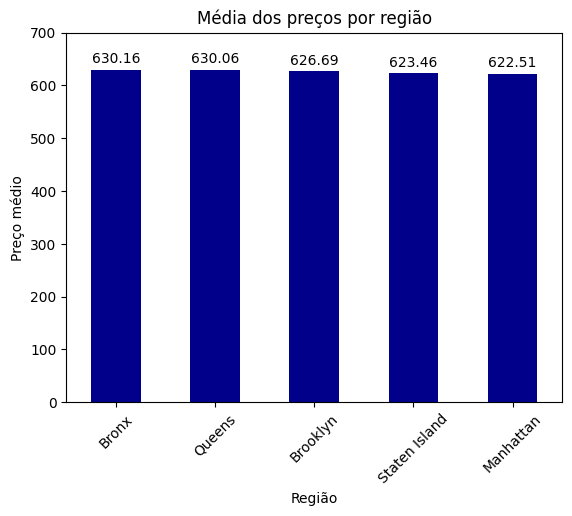

In [26]:
# Criando o gráfico de barras
ax = media_precos_regiao.plot(kind='bar', color='darkblue')
plt.title('Média dos preços por região')
plt.xlabel('Região')
plt.ylabel('Preço médio')
plt.ylim(0,700)

# Rotacionando os rótulos do eixo x em 45 graus
plt.xticks(rotation=45)

# Adicionando os valores no topo das barras
for i, valor in enumerate(media_precos_regiao):
    ax.text(i, valor + 7, f'{valor:.2f}', ha='center', va='bottom')

plt.show()

In [27]:
# Amplitude de media_preco_regiao:
print(f'Amplitude: {round(media_precos_regiao.max() - media_precos_regiao.min(),2)} dólares')

Amplitude: 7.65 dólares


A tabela e o gráfico nos indicam uma baixa variação no preço médio das acomodações entre as regiões de Nova York, com uma diferença de apenas 7,65 dólares entre a região mais cara (Bronx) e a região mais barata (Manhattan).

In [28]:
###

### Visualizando as acomodações no mapa de Nova York

In [29]:
#df[['lat', 'long']].head()

In [30]:
# Verificando valores NA:
#display(df[['lat', 'long']].isna().sum())


In [31]:
gerar_mapa = False #@param {type: "boolean"}

if gerar_mapa:
  # Removendo valores NA (apenas para plotar pontos no mapa):
  df_mapa = df[['lat', 'long']].dropna()

  # Definindo um ponto central no mapa:
  mapa_centro = [df_mapa['lat'].mean(), df_mapa['long'].mean()]
  mapa = folium.Map(location=mapa_centro, zoom_start=12)

  # Inserindo acomodações no mapa de Nova York:
  for _, row in df_mapa.iterrows():
      folium.Marker(
          location=[row['lat'], row['long']],
          popup=f"Lat: {row['lat']}, Lon: {row['long']}"
      ).add_to(mapa)


In [32]:
#mapa